In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Stworzenie często powtarzanych argumentów do wykresów.

In [36]:
title_args = {
    "fontweight": "bold",
    "fontsize": "x-large",
    "pad": 10
}

Eksploracja danych oraz przygotowanie danych do tworzenia wykresów.

In [37]:
data = pd.read_csv("data/Sleep_health_and_lifestyle_dataset.csv", index_col="Person ID")
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Sprawdzenie wartości brakujących. Występują takie tylko w "Sleep Disorder" i reprezentują brak zaburzeń snu, dlatego nie należy się nimi zajmować.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


Przygotowanie danych do wykresów.

In [39]:
data_by_gender = data.groupby("Gender").size()
data_by_gender_occ_f = data[data["Gender"] == "Female"].groupby(["Occupation"]).size()
data_by_gender_occ_m = data[data["Gender"] == "Male"].groupby(["Occupation"]).size()
data_by_gender_occ_all = pd.DataFrame(
    {"females": data_by_gender_occ_f,
     "males": data_by_gender_occ_m}
)
data_by_gender_occ_all = data_by_gender_occ_all.fillna(0)
data_by_gender_occ_all

,females,males
Occupation,,
Accountant,36.0,1.0
Doctor,2.0,69.0
Engineer,32.0,31.0
Lawyer,2.0,45.0
Manager,1.0,0.0
Nurse,73.0,0.0
Sales Representative,0.0,2.0
Salesperson,0.0,32.0
Scientist,4.0,0.0


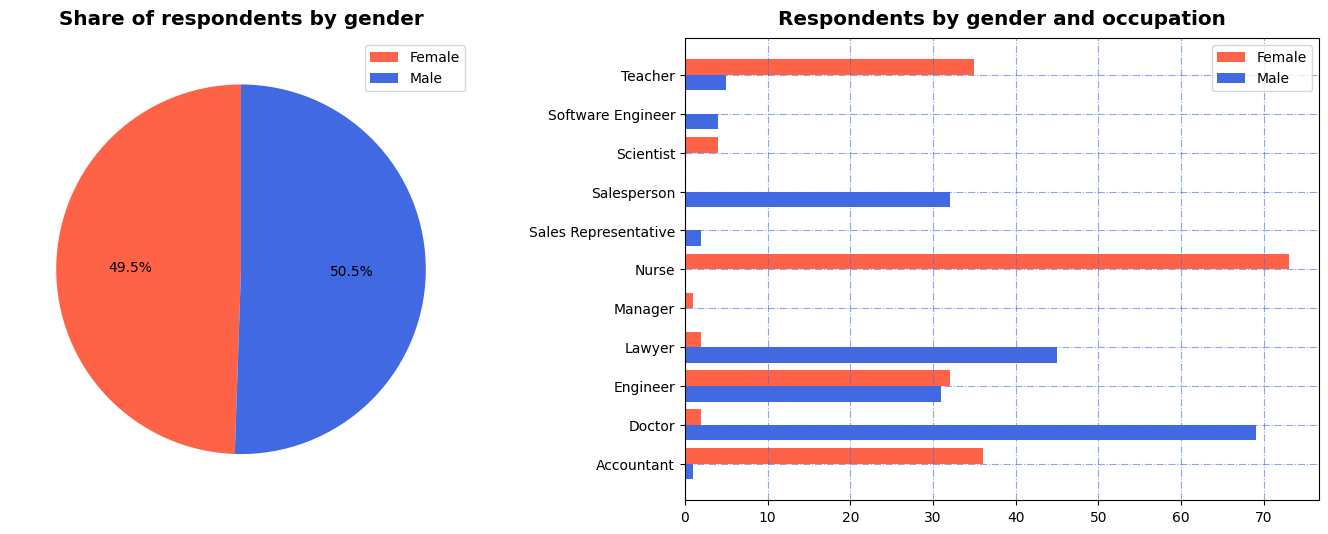

In [40]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.pie(data_by_gender, colors=('tomato', 'royalblue'), autopct='%1.1f%%', startangle=90)
plt.title('Share of respondents by gender',**title_args)
plt.legend(labels=["Female", "Male"])

plt.subplot(1,2,2)
x = np.arange(len(data_by_gender_occ_all.index))
plt.barh(x + 0.2, data_by_gender_occ_all.females, color='tomato', height=0.4, label="Female")
plt.barh(x - 0.2, data_by_gender_occ_all.males, color='royalblue', height=0.4, label="Male")
plt.yticks(x, data_by_gender_occ_all.index)
plt.grid(alpha=0.6, color="royalblue", linestyle='-.')
plt.title('Respondents by gender and occupation', **title_args)
plt.legend()

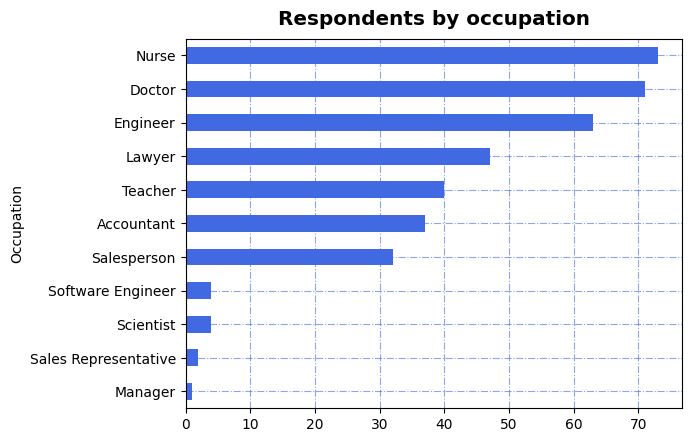

In [41]:
data_by_occupation = data.groupby("Occupation").size().sort_values()
data_by_occupation.plot(kind="barh", color="royalblue")
plt.grid(alpha=0.6, color="royalblue", linestyle='-.')
plt.title("Respondents by occupation", **title_args)
plt.show()


Przygotowanie danych do stworzenia wykresu populacji badanych. Po sprawdzeniu okazało się, że badani są w wieku od 27 do 59 lat, jednak wśród nich nie ma nikogo z wiekiem 46 i 47 lat. Postanowiłam zapełnić tę lukę wartościami zerowymi, aby wykres opisywał prawdziwe dane.

In [42]:

data_by_age_f = data[data["Gender"] == "Female"].groupby(["Age"]).size()
data_by_age_m = data[data["Gender"] == "Male"].groupby(["Age"]).size()
data_by_age_all = pd.DataFrame(
    {"females": data_by_age_f,
     "males": data_by_age_m}
)
data_by_age_all = data_by_age_all.fillna(0)
data_by_age_all

,females,males
Age,,
27,0.0,1.0
28,0.0,5.0
29,2.0,11.0
30,2.0,11.0
31,1.0,17.0
32,0.0,17.0
33,2.0,11.0
34,2.0,0.0
35,1.0,11.0


In [43]:
missing_data_by_age = pd.DataFrame({"females":[0,0],"males":[0,0]})
data_by_age_filled = data_by_age_all._append(missing_data_by_age)
data_by_age_filled = data_by_age_filled.rename(index={0:46, 1:47}).sort_index()
data_by_age_filled

,females,males
27,0.0,1.0
28,0.0,5.0
29,2.0,11.0
30,2.0,11.0
31,1.0,17.0
32,0.0,17.0
33,2.0,11.0
34,2.0,0.0
35,1.0,11.0
36,10.0,2.0


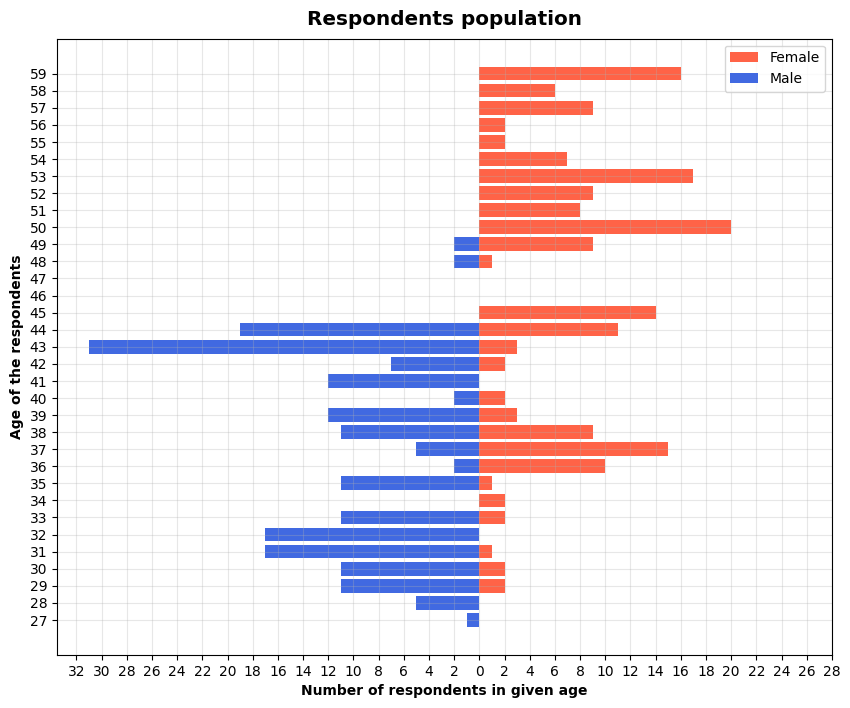

In [52]:
plt.figure(figsize=(10,8))
x = np.arange(data_by_age_filled.index[0], data_by_age_filled.index[0]+len(data_by_age_filled.index))
plt.barh(x, data_by_age_filled["females"], color='tomato', label="Female")
plt.barh(x, data_by_age_filled["males"]*-1, color='royalblue', label="Male")
plt.yticks(x)
labs = [x for x in range(32,1,-2)] + [x for x in range(0,30,2)]
plt.xticks(range(-32,30,2), labels=labs)
plt.ylabel("Age of the respondents", fontweight="bold")
plt.title("Respondents population", **title_args)
plt.xlabel("Number of respondents in given age", fontweight="bold")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [45]:
stress_at_occupation = data.groupby("Occupation")["Stress Level"].value_counts().reset_index()
stress_at_occupation

,Occupation,Stress Level,count
0,Accountant,4,26
1,Accountant,7,6
2,Accountant,6,3
3,Accountant,3,2
4,Doctor,8,33
5,Doctor,6,32
6,Doctor,3,4
7,Doctor,5,2
8,Engineer,3,34
9,Engineer,5,16


In [46]:
stress_at_occupation["Stress Level"].unique()

array([4, 7, 6, 3, 8, 5], dtype=int64)

In [47]:
stress_levels = pd.DataFrame()
for x in range(3,9):
    stress_at_occupation_x = (stress_at_occupation[stress_at_occupation["Stress Level"]==x]
                          .set_index("Occupation")
                          .drop("Stress Level", axis=1)
                          .rename(columns={"count": f"stress_level_{x}"})
                          .reindex(stress_at_occupation["Occupation"].unique(), fill_value=0))
    stress_levels.insert(len(stress_levels.columns), f"stress_level_{x}",stress_at_occupation_x)
stress_levels


,stress_level_3,stress_level_4,stress_level_5,stress_level_6,stress_level_7,stress_level_8
Occupation,,,,,,
Accountant,2,26,0,3,6,0
Doctor,4,0,2,32,0,33
Engineer,34,9,16,1,3,0
Lawyer,0,0,44,3,0,0
Manager,0,0,1,0,0,0
Nurse,31,4,0,2,4,32
Sales Representative,0,0,0,0,0,2
Salesperson,0,0,0,0,32,0
Scientist,0,0,0,2,0,2


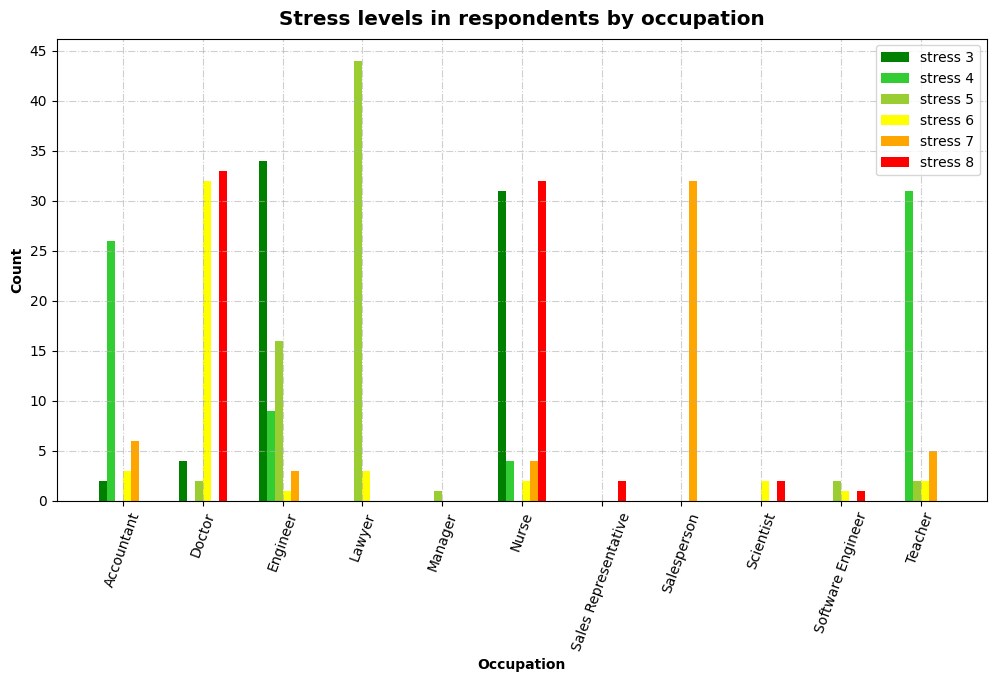

In [48]:
plt.figure(figsize=(12,6))
wid = 0.1
modifier = 0.25
x = np.arange(len(stress_at_occupation['Occupation'].unique()))
colors = ["green","limegreen","yellowgreen","yellow","orange","red"]
for i in range(3,9):
    plt.bar(x-modifier, stress_levels[f'stress_level_{i}'], color=colors[i-3], label=f"stress {i}", width=wid)
    modifier = modifier - 0.10
plt.xticks(ticks=x,labels=stress_at_occupation['Occupation'].unique(), rotation=70)
plt.yticks(range(0,50,5))
plt.ylabel("Count", fontweight="bold")
plt.xlabel("Occupation",fontweight="bold")
plt.title("Stress levels in respondents by occupation", **title_args)
plt.grid(alpha=0.6, linestyle='-.')
plt.legend()

In [49]:
scatter_data = data[["Gender", "Age", "Quality of Sleep"]].value_counts().reset_index()
scatter_data_f = scatter_data[scatter_data["Gender"]=="Female"]
scatter_data_m = scatter_data[scatter_data["Gender"]=="Male"]
scatter_data["count"].max()

19

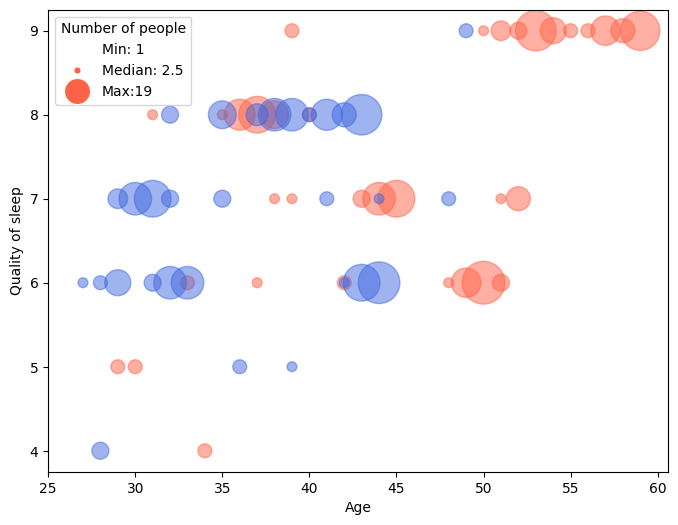

In [50]:

from matplotlib.lines import Line2D
plt.figure(figsize=(8,6))

plt1 = plt.scatter(x=scatter_data_f["Age"], y=scatter_data_f["Quality of Sleep"], color="tomato",s=scatter_data_f["count"]*50, alpha=0.5, label="Female")
plt.scatter(x=scatter_data_m["Age"], y=scatter_data_m["Quality of Sleep"], color="royalblue",s=scatter_data_m["count"]*50, alpha=0.5, label="Male")
plt.xticks(range(25,65,5))
plt.xlabel("Age")
plt.ylabel("Quality of sleep")
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='tomato', markersize=scatter_data_f["count"].min(), 
                          label=f'Min: {scatter_data_f["count"].min()}'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='tomato', markersize=scatter_data_f["count"].mean(), 
                          label=f'Median: {scatter_data_f["count"].median()}'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='tomato', markersize=scatter_data_f["count"].max(), 
                          label=f'Max:{scatter_data_f["count"].max()}')]

plt.legend(handles=legend_elements, title='Number of people')
# plt.legend(*plt1.legend_elements("sizes", num=3))
